# Real Estate Data Analysis - 15 Medium Problems

This notebook contains 15 medium-level problems to practice your data analysis skills using pandas, numpy, and matplotlib.

**Dataset**: `real_estate_data.csv`

**Instructions**: 
- Load the dataset and solve each problem in the designated cell
- Use pandas, numpy, and matplotlib as needed
- Write clean, well-commented code
- Display results clearly

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the dataset
df = pd.read_csv('real_estate_data.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (40, 33)


,property_id,address,city,state,zip_code,property_type,bedrooms,bathrooms,square_feet,lot_size,year_built,listing_price,sale_price,days_on_market,listing_date,sale_date,agent_id,agent_name,commission_rate,hoa_fee,parking_spaces,has_pool,has_garage,school_rating,crime_rate,walkability_score,property_tax,last_renovation_year,heating_type,cooling_type,flooring_type,view_type,neighborhood
0,P001,123 Oak Street,San Francisco,CA,94102,Single Family,3,2.0,1850,4500,1985,1250000,1200000,45,2024-01-15,2024-03-01,A101,Sarah Johnson,0.025,0,2,No,Yes,9,2.1,85,15000,2018,Central,Central AC,Hardwood,City,Downtown
1,P002,456 Maple Ave,San Francisco,CA,94103,Condo,2,2.0,1200,0,2010,875000,850000,30,2024-02-01,2024-03-03,A102,Michael Chen,0.030,350,1,No,Yes,8,2.5,90,10500,2020,Forced Air,Central AC,Laminate,Bay,Mission Bay
2,P003,789 Pine Road,Oakland,CA,94601,Townhouse,3,2.5,1650,2000,2015,725000,710000,22,2024-01-20,2024-02-11,A103,Emily Rodriguez,0.025,275,2,No,Yes,7,3.2,75,8700,2021,Radiant,Window AC,Carpet,Garden,Rockridge
3,P004,321 Elm Drive,Berkeley,CA,94704,Single Family,4,3.0,2400,6000,1978,1450000,1425000,60,2023-12-10,2024-02-08,A101,Sarah Johnson,0.025,0,3,Yes,Yes,10,1.8,88,17400,2019,Central,Central AC,Hardwood,Mountain,Berkeley Hills
4,P005,654 Birch Lane,San Jose,CA,95110,Condo,1,1.0,750,0,2018,550000,545000,18,2024-02-15,2024-03-05,A104,David Kim,0.030,425,1,No,No,6,3.5,70,6600,2022,Baseboard,NaN,Tile,Street,Downtown SJ


In [2]:
df['discount_pct'] = ((df['listing_price'] - df['sale_price']) / df['listing_price'] * 100)

price_analysis = df.groupby('property_type').agg({
    'listing_price':'mean',
    'sale_price':'mean',
    'discount_pct':'mean'
}).round(2)


price_analysis = price_analysis.sort_values('sale_price',ascending=False)

print(price_analysis)








               listing_price  sale_price  discount_pct
property_type                                         
Single Family     1875000.00  1820600.00          2.72
Townhouse          812857.14   793571.43          2.32
Condo              740625.00   723125.00          2.27


In [3]:
#Top Performing Agents - Multi-metric agent performance analysis

df['commision_earned'] = df['sale_price'] * df['commission_rate']

In [4]:
agent_performance = df.groupby(['agent_id','agent_name']).agg({
    'property_id':'count',
    'sale_price':'sum',
    'commision_earned':'sum',
    'days_on_market':'mean'
}).rename(columns={
    'property_id':'properties_sold',
    'sale_price':'total_sales_volume',
    'days_on_market':'average_days_on_market',
    'commision_earned':'total_commission_earned'
}).round(2)

top_agents = agent_performance.sort_values('total_sales_volume',ascending=False).head(10)

top_agents




,,properties_sold,total_sales_volume,total_commission_earned,average_days_on_market
agent_id,agent_name,,,,
A116,Thomas Anderson,3,8800000,176000.0,69.00
A118,Victoria Chen,2,8225000,123375.0,81.50
A105,Lisa Wang,3,7625000,152500.0,67.00
A107,Amanda Lee,4,4950000,128250.0,44.75
A108,James Park,2,3425000,85625.0,58.50
A106,Robert Martinez,3,3200000,80000.0,39.33
A102,Michael Chen,3,2630000,70000.0,31.00
A101,Sarah Johnson,2,2625000,65625.0,52.50
A117,Brian Lee,2,2440000,61000.0,40.50


In [5]:
df['price_per_sqft'] = df['sale_price'] / df['square_feet']


city_price_sqft = df.groupby('city')['price_per_sqft'].mean().sort_values(ascending=False)


print(f'Highest: {city_price_sqft.index[0]}  ${city_price_sqft.iloc[0]:.2f}/sqft')
print(f'Lowest: {city_price_sqft.index[-1]}  ${city_price_sqft.iloc[-1]:.2f}/sqft')




Highest: Atherton  $1038.89/sqft
Lowest: Antioch  $339.39/sqft


In [6]:
top_10_cities = city_price_sqft.head(10)

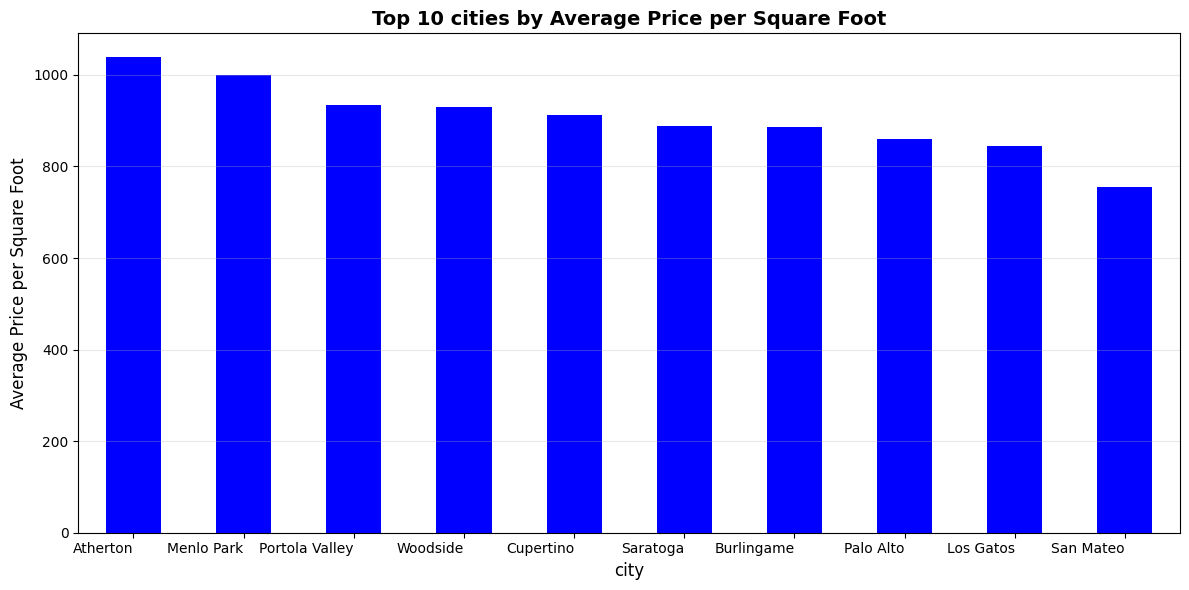

In [7]:
plt.figure(figsize=(12,6))
top_10_cities.plot(kind='bar',color='blue')
plt.title('Top 10 cities by Average Price per Square Foot',fontsize=14,fontweight='bold')
plt.xlabel('city',fontsize=12)
plt.ylabel('Average Price per Square Foot',fontsize=12)
plt.xticks(rotation=0,ha='right')
plt.grid(axis='y',alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
features = [
    'sale_price','square_feet','bedrooms',
    'bathrooms','year_built','school_rating'
    ,'walkability_score'
]

correlation_matrix = df[features].corr()
correlations_with_price = correlation_matrix['sale_price'].drop('sale_price').sort_values(

    ascending=False
)

In [9]:
print('Correlations With Sale Price')
print(correlations_with_price)
print(f'Strongest correlation:{correlations_with_price.index[0]}')
print(f'Weakest correlation:{correlations_with_price.index[-1]}')

Correlations With Sale Price
square_feet          0.923654
bathrooms            0.880892
bedrooms             0.811402
school_rating        0.742283
walkability_score   -0.090017
year_built          -0.326519
Name: sale_price, dtype: float64
Strongest correlation:square_feet
Weakest correlation:year_built


In [10]:
def categorize_speed(days):
    if days <= 25:
        return 'Fast'
    elif days <= 50:
        return 'Medium'
    else:
        return 'Slow'

df['market_speed'] = df['days_on_market'].apply(categorize_speed)

In [11]:
df.head(10)

,property_id,address,city,state,zip_code,property_type,bedrooms,bathrooms,square_feet,lot_size,year_built,listing_price,sale_price,days_on_market,listing_date,sale_date,agent_id,agent_name,commission_rate,hoa_fee,parking_spaces,has_pool,has_garage,school_rating,crime_rate,walkability_score,property_tax,last_renovation_year,heating_type,cooling_type,flooring_type,view_type,neighborhood,discount_pct,commision_earned,price_per_sqft,market_speed
0,P001,123 Oak Street,San Francisco,CA,94102,Single Family,3,2.0,1850,4500,1985,1250000,1200000,45,2024-01-15,2024-03-01,A101,Sarah Johnson,0.025,0,2,No,Yes,9,2.1,85,15000,2018,Central,Central AC,Hardwood,City,Downtown,4.000000,30000.0,648.648649,Medium
1,P002,456 Maple Ave,San Francisco,CA,94103,Condo,2,2.0,1200,0,2010,875000,850000,30,2024-02-01,2024-03-03,A102,Michael Chen,0.030,350,1,No,Yes,8,2.5,90,10500,2020,Forced Air,Central AC,Laminate,Bay,Mission Bay,2.857143,25500.0,708.333333,Medium
2,P003,789 Pine Road,Oakland,CA,94601,Townhouse,3,2.5,1650,2000,2015,725000,710000,22,2024-01-20,2024-02-11,A103,Emily Rodriguez,0.025,275,2,No,Yes,7,3.2,75,8700,2021,Radiant,Window AC,Carpet,Garden,Rockridge,2.068966,17750.0,430.303030,Fast
3,P004,321 Elm Drive,Berkeley,CA,94704,Single Family,4,3.0,2400,6000,1978,1450000,1425000,60,2023-12-10,2024-02-08,A101,Sarah Johnson,0.025,0,3,Yes,Yes,10,1.8,88,17400,2019,Central,Central AC,Hardwood,Mountain,Berkeley Hills,1.724138,35625.0,593.750000,Slow
4,P005,654 Birch Lane,San Jose,CA,95110,Condo,1,1.0,750,0,2018,550000,545000,18,2024-02-15,2024-03-05,A104,David Kim,0.030,425,1,No,No,6,3.5,70,6600,2022,Baseboard,NaN,Tile,Street,Downtown SJ,0.909091,16350.0,726.666667,Fast
5,P006,987 Cedar Court,Palo Alto,CA,94301,Single Family,5,4.0,3200,8000,1995,2850000,2750000,75,2023-11-20,2024-02-03,A105,Lisa Wang,0.020,0,4,Yes,Yes,10,1.2,82,34200,2020,Central,Central AC,Hardwood,Garden,Old Palo Alto,3.508772,55000.0,859.375000,Slow
6,P007,147 Willow Way,Mountain View,CA,94040,Townhouse,2,2.0,1400,1500,2012,950000,925000,35,2024-01-25,2024-03-01,A102,Michael Chen,0.025,300,2,No,Yes,8,2.0,78,11400,2023,Forced Air,Central AC,Laminate,Park,North Bayshore,2.631579,23125.0,660.714286,Medium
7,P008,258 Spruce Street,Fremont,CA,94536,Single Family,4,2.5,2100,5500,1988,1125000,1100000,42,2024-01-05,2024-02-16,A106,Robert Martinez,0.025,0,2,No,Yes,7,2.8,68,13500,2017,Central,Central AC,Carpet,Street,Mission San Jose,2.222222,27500.0,523.809524,Medium
8,P009,369 Ash Boulevard,Sunnyvale,CA,94086,Condo,2,2.0,1100,0,2016,825000,800000,28,2024-02-05,2024-03-05,A104,David Kim,0.030,380,1,Yes,Yes,8,2.3,75,9900,2021,Radiant,Central AC,Hardwood,Pool,West Sunnyvale,3.030303,24000.0,727.272727,Medium
9,P010,741 Redwood Ave,San Mateo,CA,94401,Single Family,3,2.0,1750,4000,1982,1350000,1320000,50,2023-12-28,2024-02-16,A107,Amanda Lee,0.025,0,2,No,Yes,9,1.9,84,16200,2019,Central,Central AC,Hardwood,Bay,Baywood,2.222222,33000.0,754.285714,Medium


In [12]:
speed_stats = df.groupby('market_speed').agg({
    'sale_price':'mean',
    'property_id':'count',
    'days_on_market':'mean'
}).rename(columns={'property_id':'count'})


speed_stats





,sale_price,count,days_on_market
market_speed,,,
Fast,6.175000e+05,6,22.000000
Medium,1.005227e+06,22,37.863636
Slow,2.586250e+06,12,66.666667


In [13]:
speed_stats['percentage'] = (speed_stats['count'] / len(df) * 100).round(2)
print(speed_stats)
print(f'Percentage of fast sales:{speed_stats.loc["Fast",'percentage']:.2f}%')

                sale_price  count  days_on_market  percentage
market_speed                                                 
Fast          6.175000e+05      6       22.000000        15.0
Medium        1.005227e+06     22       37.863636        55.0
Slow          2.586250e+06     12       66.666667        30.0
Percentage of fast sales:15.00%


In [14]:
#Premium Features Impact - Comparative analysis (pools vs garages)

pool_yes = df[df['has_pool'] == 'Yes']['sale_price'].mean()
pool_no = df[df['has_pool']== 'No']['sale_price'].mean()
pool_diff = pool_yes - pool_no
pool_premium = (pool_diff / pool_no) * 100

print(f'With Pool: ${pool_yes:.2f}')
print(f'Without Pool: ${pool_no:.2f}')
print(f'Differences ${pool_diff:.2f}')
print(f'Premium: {pool_premium:.2f}%')

With Pool: $2166250.00
Without Pool: $924791.67
Differences $1241458.33
Premium: 134.24%


In [15]:
garage_yes = df[df['has_garage'] == 'Yes']['sale_price'].mean()
garage_no = df[df['has_garage'] == 'No']['sale_price'].mean()
garage_diff = garage_yes - garage_no
garage_premium = (garage_diff / garage_no * 100)

In [16]:
print('Garage Analysis')
print(f'With Garage: ${garage_yes:.2f}')
print(f'Without Garage: ${garage_no:.2f}')
print(f'Difference: ${garage_diff:.2f}')
print(f'Premium:{garage_premium:.2f}%\n')

Garage Analysis
With Garage: $1469605.26
Without Garage: $505000.00
Difference: $964605.26
Premium:191.01%



In [17]:
if pool_premium > garage_premium:
    print(f"Pool adds more value:{pool_premium:.2f}% vs {garage_premium:.2f}%")
else:
    print(f'Garage adds more value:{garage_premium:.2f}% vs {pool_premium:.2f}%')






Garage adds more value:191.01% vs 134.24%


In [18]:
df['house_age'] = 2025 - df['year_built']





In [19]:
max_crime = df['crime_rate'].max()
min_crime = df['crime_rate'].min()

df['crime_score'] = 10 - ((df['crime_rate'] - min_crime) / (max_crime - min_crime) * 10)


#Calculate neighborhood quality score

df['neighborhood_quality'] = (

    df['school_rating'] * 0.4 +
    (df['walkability_score'] / 10) + 0.3 +
    df['crime_score'] * 0.3
)



In [20]:
top_5_neighborhoods = df.groupby('neighborhood')['neighborhood_quality'].mean().sort_values(ascending=False).head(5)

print('Top 5 Neighborhoods by Quality Score')


for i, (neighborhood, quality) in enumerate(top_5_neighborhoods.items(),1):
    print(f'{i} {neighborhood} : {quality:.2f}')








Top 5 Neighborhoods by Quality Score
1 Allied Arts : 15.39
2 Berkeley Hills : 15.29
3 Old Palo Alto : 15.18
4 Burlingame Hills : 15.13
5 Monta Vista : 15.06


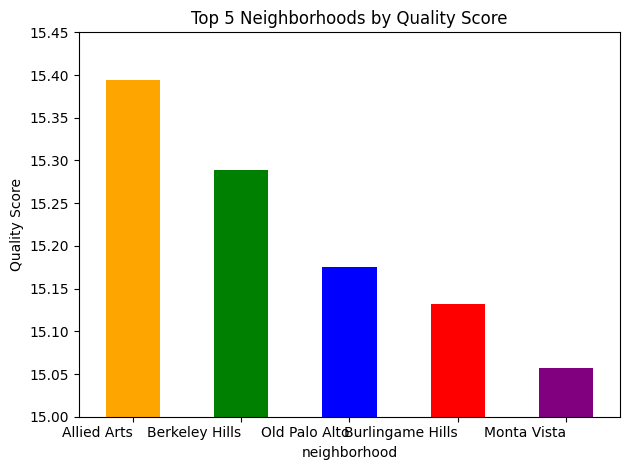

In [21]:
ax = top_5_neighborhoods.plot(kind='bar',color=['orange','green','blue','red','purple'])

ax.set_ylim(15.0,15.45)
ax.set_ylabel('Quality Score')
ax.set_title('Top 5 Neighborhoods by Quality Score')

plt.xticks(rotation=0,ha='right')
plt.tight_layout()


plt.show()

In [22]:
current_year = 2025

df['age_group'] = pd.cut(df['house_age'],
    bins=[0,10,20,30,40,100],
    labels=['0-10','11-20','21-30','31-40','41-100']
)


age_price = df.groupby('age_group',observed=True)['sale_price'].mean().sort_index()

print('Average Sale Price by Property Age')
print(age_price)

Average Sale Price by Property Age
age_group
0-10      7.300000e+05
11-20     8.000000e+05
21-30     2.956250e+06
31-40     2.016818e+06
41-100    1.178333e+06
Name: sale_price, dtype: float64


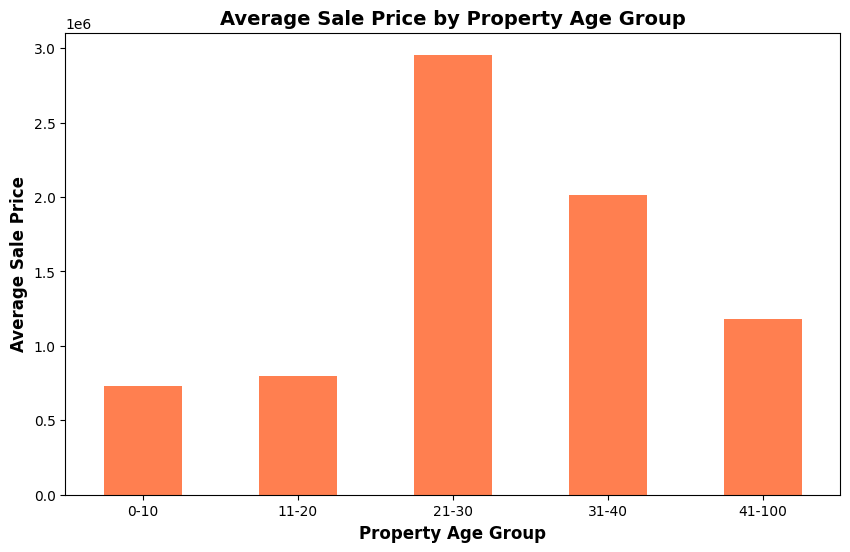

C:\Users\francis\AppData\Local\Temp\ipykernel_26104\3465834692.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 2062x1092630057 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [23]:
plt.figure(figsize=(10,6))
age_price.plot(kind='bar',color='coral')
plt.title('Average Sale Price by Property Age Group',fontsize=14,fontweight='bold')
plt.xlabel('Property Age Group',fontsize=12,fontweight='bold')
plt.ylabel('Average Sale Price',fontsize=12,fontweight='bold')
plt.xticks(rotation=0)
plt.show()


for i, v in enumerate(age_price):
    plt.text(i,v,f"${v/1000:.0f}K", ha='center',va='bottom')

plt.tight_layout()
plt.show()





In [24]:
df['is_renovated'] = df['last_renovation_year'].notna()

df['years_since_renovation'] = current_year - df['last_renovation_year']

In [25]:
renovated_avg = df[df['is_renovated']]['sale_price'].mean()
not_renovated_avg = df[~df['is_renovated']]['sale_price'].mean()
renovation_premium = ((renovated_avg - not_renovated_avg) / not_renovated_avg * 100)


print('Renovated Impact')
print(f'Renovated Properties: ${renovated_avg:.2f}')
print(f'Non-Renovated Properties: ${not_renovated_avg:.2f}')
print(f'Premium: {renovation_premium:.2f}%')


recent_reno = df[df['years_since_renovation'] <= 5]['sale_price'].mean()
older_reno = df[df['years_since_renovation'] > 5]['sale_price'].mean()


print(f'Recent Renovation Impact')
print(f'Recent renovation (<= 5 years): ${recent_reno:.2f}')
print(f'Older renovation (> 5 years): ${older_reno:.2f}')
print(f'Recent renovation premium:{((recent_reno-older_reno) / older_reno * 100):2f}%')




Renovated Impact
Renovated Properties: $1421375.00
Non-Renovated Properties: $nan
Premium: nan%
Recent Renovation Impact
Recent renovation (<= 5 years): $1350416.67
Older renovation (> 5 years): $1527812.50
Recent renovation premium:-11.611100%


In [26]:
df.head(2)

,property_id,address,city,state,zip_code,property_type,bedrooms,bathrooms,square_feet,lot_size,year_built,listing_price,sale_price,days_on_market,listing_date,sale_date,agent_id,agent_name,commission_rate,hoa_fee,parking_spaces,has_pool,has_garage,school_rating,crime_rate,walkability_score,property_tax,last_renovation_year,heating_type,cooling_type,flooring_type,view_type,neighborhood,discount_pct,commision_earned,price_per_sqft,market_speed,house_age,crime_score,neighborhood_quality,age_group,is_renovated,years_since_renovation
0,P001,123 Oak Street,San Francisco,CA,94102,Single Family,3,2.0,1850,4500,1985,1250000,1200000,45,2024-01-15,2024-03-01,A101,Sarah Johnson,0.025,0,2,No,Yes,9,2.1,85,15000,2018,Central,Central AC,Hardwood,City,Downtown,4.000000,30000.0,648.648649,Medium,40,6.486486,14.345946,31-40,True,7
1,P002,456 Maple Ave,San Francisco,CA,94103,Condo,2,2.0,1200,0,2010,875000,850000,30,2024-02-01,2024-03-03,A102,Michael Chen,0.030,350,1,No,Yes,8,2.5,90,10500,2020,Forced Air,Central AC,Laminate,Bay,Mission Bay,2.857143,25500.0,708.333333,Medium,15,5.405405,14.121622,11-20,True,5


In [27]:
df['commission_earned'] = df['sale_price'] *  df['commission_rate']

In [28]:
agent_commision = df.groupby('agent_name')['commission_earned'].sum().sort_values(ascending=False)

print(f'Agent with the highest commission: {agent_commision.index[0]} with ${agent_commision.values[0]:.2f}')
print(f'Agent with the lowest commission: {agent_commision.index[-1]} with ${agent_commision.values[-1]:.2f}')


Agent with the highest commission: Thomas Anderson with $176000.00
Agent with the lowest commission: Sophia Nguyen with $13950.00


In [29]:
avg_commision_rate = df['commission_rate'].mean()
avg_commision_rate

np.float64(0.02475)

In [33]:
agent_commision

agent_name
Thomas Anderson      176000.0
Lisa Wang            152500.0
Amanda Lee           128250.0
Victoria Chen        123375.0
James Park            85625.0
Robert Martinez       80000.0
Michael Chen          70000.0
Sarah Johnson         65625.0
David Kim             61650.0
Brian Lee             61000.0
Rachel Kim            51250.0
Christopher Brown     48125.0
Jennifer Wu           45450.0
Patricia Wong         42125.0
Emily Rodriguez       34250.0
Kevin Patel           17375.0
Michelle Zhang        15375.0
Daniel Garcia         14000.0
Sophia Nguyen         13950.0
Name: commission_earned, dtype: float64

In [38]:
agent_commision.reset_index()


agent_commision.sort_values('commission_earned').plot(
    kind='barh',
    x='agent_name',
    y='commision_earned',
    legend=False
)

plt.xlabel('Agent')
plt.show()



TypeError: Series.sort_values() takes 1 positional argument but 2 were given

In [ ]:
df.head()

In [ ]:
most_common_rate = df['commission_rate'].mode()
print(f'Most common commision rate:{most_common_rate}')

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['sale_price'], df['commission_earned'], alpha=0.6, c=df['commission_rate'], 
            cmap='viridis', s=100, edgecolors='black', linewidth=0.5)
plt.colorbar(label='Commission Rate')
plt.title('Sale Price vs Commission Earned', fontsize=14, fontweight='bold')
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Commission Earned ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
# Outlier Detection


Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



print(f'Q1: ${Q1:.2f}')
print(f'Q3: ${Q3:.2f}')
print(f'IQR: ${IQR:.2f}')
print(f'Lower Bound: ${lower_bound:.2f}')
print(f'Upper Bound: ${upper_bound:.2f}')



outliers = df[(df['sale_price'] < lower_bound | (df['sale_price'] > upper_bound))]

print(f'Number of outliers:{len(outliers)}')
print(f'Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%')




Q1: $790000.00
Q3: $1621250.00
IQR: $831250.00
Lower Bound: $-456875.00
Upper Bound: $2868125.00


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [bool]

In [ ]:
#comprehensive propert ranking
from sklearn.preprocessing import MinMaxScaler

scoring_df = df.copy()

scoring_df['price_per_sqft'] = scoring_df['sale_price'] / scoring_df['square_feet']

features_to_normalize = ['price_per_sqft','school_rating','walkability_score',
'days_on_market','crime_rate']


scaler = MinMaxScaler()
normalized = scaler.fit_transform(scoring_df[features_to_normalize])


for i, feature in enumerate(features_to_normalize):
    scoring_df[f'{feature}_norm'] = normalized[:,i]




In [45]:
print(scoring_df)

   property_id             address            city state  zip_code  \
0         P001      123 Oak Street   San Francisco    CA     94102   
1         P002       456 Maple Ave   San Francisco    CA     94103   
2         P003       789 Pine Road         Oakland    CA     94601   
3         P004       321 Elm Drive        Berkeley    CA     94704   
4         P005      654 Birch Lane        San Jose    CA     95110   
5         P006     987 Cedar Court       Palo Alto    CA     94301   
6         P007      147 Willow Way   Mountain View    CA     94040   
7         P008   258 Spruce Street         Fremont    CA     94536   
8         P009   369 Ash Boulevard       Sunnyvale    CA     94086   
9         P010     741 Redwood Ave       San Mateo    CA     94401   
10        P011   852 Cypress Drive         Hayward    CA     94541   
11        P012    963 Sequoia Lane    Walnut Creek    CA     94596   
12        P013  159 Magnolia Court      Pleasanton    CA     94566   
13        P014   357